In [ ]:
cd(expanduser("full_path_of_the_notebook"))
Base.init_active_project()
pwd(), Base.active_project(), gethostname()

("/project/minus3-simulation/code/DemoInfer.jl/example", "/project/minus3-simulation/code/DemoInfer.jl/Project.toml", "folsomprisonblues.molgen.mpg.de")

In [2]:
using DemoInfer

[ Info: Precompiling DemoInfer [50651ce3-0423-45d2-b99c-8ea4267d2717] (cache misses: include_dependency fsize change (2))


In [3]:
using HistogramBinnings, PopSimIBX
using MLDs
using PyPlot

## data

In [4]:
pop = VaryingPopulation(;
    genome_length = 1_000_000_000, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = [10_000, 2000, 10_000],
    times = [0, 10_000, 12000],
)
ĥ = HistogramBinnings.Histogram(LogEdgeVector(lo = 30, hi = 1_000_000, nbins = 200));
append!(ĥ, IBSIterator(SMCprime.IBDIterator(pop), pop.mutation_rate))

StatsBase.Histogram{Int64, 1, Tuple{LogEdgeVector{Int64}}}
edges:
  LogEdgeVector{Int64}: [30, 31, 33, 35, 36, 38, 41, 43, 45, 47, 50, 53, 56, 59, 62, 65, 69, 72, 76, 80, 84, 89, 94, 99, 104, 110, 116, 122, 128, 135, 143, 150, 158, 167, 176, 185, 195, 205, 217, 228, 240, 253, 267, 281, 296, 312, 329, 346, 365, 384, 405, 427, 449, 473, 499, 525, 554, 583, 614, 647, 682, 718, 757, 797, 840, 885, 932, 982, 1034, 1090, 1148, 1209, 1274, 1342, 1414, 1490, 1569, 1653, 1741, 1835, 1933, 2036, 2145, 2260, 2380, 2508, 2642, 2783, 2932, 3088, 3253, 3427, 3611, 3804, 4007, 4221, 4447, 4685, 4935, 5199, 5477, 5769, 6078, 6403, 6745, 7106, 7485, 7886, 8307, 8751, 9219, 9712, 10231, 10778, 11354, 11961, 12600, 13274, 13983, 14731, 15518, 16347, 17221, 18142, 19112, 20133, 21209, 22343, 23537, 24795, 26121, 27517, 28988, 30537, 32169, 33889, 35700, 37609, 39619, 41737, 43967, 46318, 48793, 51401, 54149, 57043, 60092, 63304, 66688, 70253, 74008, 77964, 82131, 86521, 91146, 96017, 101150, 106556, 11225

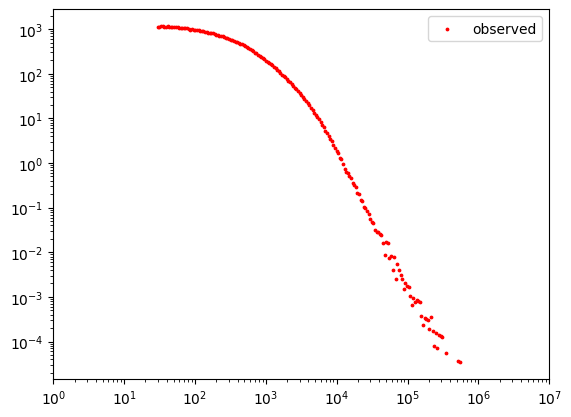

In [ ]:
plot_hist(ĥ; s=3, color="red", label="observed")

legend()
xlim(1e0,1e7)
xscale("log")
yscale("log")

## fit

In [6]:
res = sequential_fit(ĥ, 2.36e-8, 3)

3-element Vector{DemoInfer.FitResult}:
 Fit stationary (binned 200) L-BFGS ● [1.0e+09 ,7834.1] -2526.468
 Fit 2 epochs (binned 200) L-BFGS ● [9.8e+08 ,7734.3 ,2060.5 ,15281.4] -2309.738
 Fit 3 epochs (binned 200) L-BFGS ● [9.9e+08 ,15857.7 ,38671.7 ,6877.3 ,3310.9 ,14639.4] -1058.495

In [7]:
get_evidence.(res)

3-element Vector{Float64}:
 -2540.4602810777387
 -2329.85865860667
 -1085.9500338521634

In [8]:
res, chains = corrected_fit(ĥ, 3, 2.36e-8, 1e-8, start = 1, iters = 10, final_factor=100)

──────────────────────────────────────────────────────────────────────────────
              Coef.  Std. Error        z  Pr(>|z|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────
TN[1]     1.00952e9   2.02828e6  497.722       0.0     1.00554e9     1.01349e9
TN[2]  7972.49       13.5968     586.352       0.0  7945.84       7999.14
──────────────────────────────────────────────────────────────────────────────
log-evidence: -1888.5081802463533
─────────────────────────────────────────────────────────────────────────────────────
               Coef.   Std. Error         z     Pr(>|z|)     Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
TN[1]      9.88467e8    3.06839e6  322.146   0.0             9.82454e8      9.94481e8
TN[2]   7930.72        14.5404     545.426   0.0          7902.22        7959.21
TN[3]   1664.42       168.877        9.8558  6.4697e-23   1333.42       

(Any[Fit stationary (binned 200) L-BFGS ● [1.0e+09 ,7972.5] -1874.478, Fit 2 epochs (binned 200) L-BFGS ● [9.9e+08 ,7930.7 ,1664.4 ,10741.7] -1812.300, Fit 3 epochs (binned 200) L-BFGS ● [1.0e+09 ,10007.9 ,7806.4 ,4858.8 ,7430.9 ,10111.9] -882.886], Any[[1.033277738011378e9 7771.5479536729545; 1.0117712397657998e9 7926.68874470953; … ; 1.0138823683238357e9 7920.195828126719; 1.0094970485378697e9 7965.340955125102], [9.847656442331958e8 7681.351505901267 1904.5288358964146 15657.093705763313; 9.93874800848455e8 7935.796495107414 1717.5731901649442 10623.203801699246; … ; 9.933493172564746e8 7928.674990212489 1913.124241666563 9963.709233678474; 9.905918346845604e8 7947.6361646838395 1787.1896828370511 10870.779185581008], [9.968692293828484e8 15562.81438811836 … 3129.8860488341234 14606.723964635508; 1.0034031257355055e9 10228.240706492392 … 6204.324381026378 10006.617680644964; … ; 1.0007631912059767e9 10018.523103643467 … 7410.1757452808515 10041.727595364642; 1.0012212447648616e9 999

### Residuals: observed vs simulation with inferred parameters

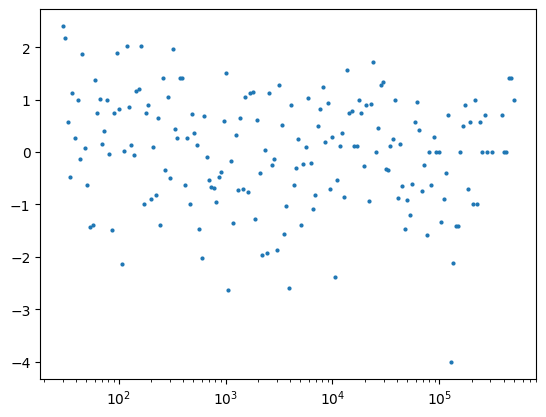

In [9]:
plot_residuals(ĥ, res[3], 2.36e-8, 1e-8; s = 4)
xscale("log")

### Residuals: observed vs naive theory

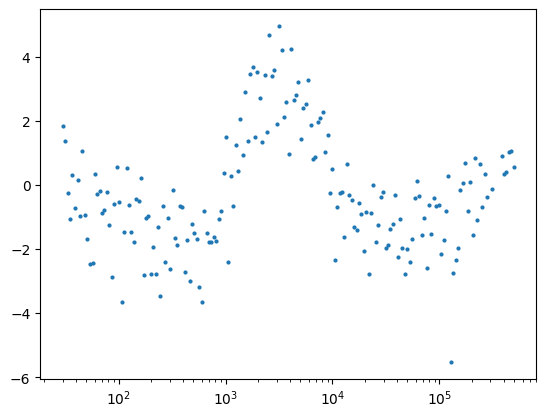

In [ ]:
plot_naive_residuals(ĥ, res[3], 2.36e-8; s = 4)
xscale("log")

## Demographic profile

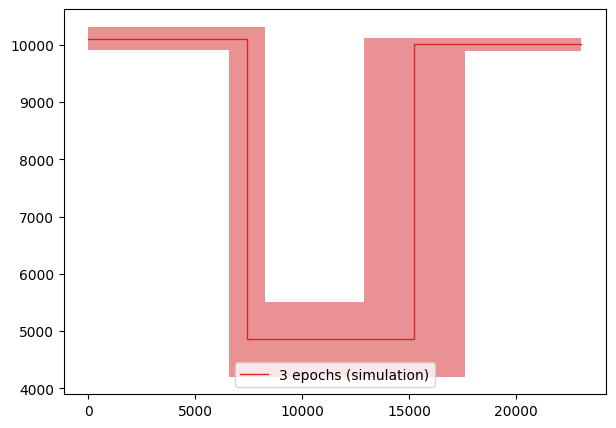

PyObject <matplotlib.legend.Legend object at 0x7ff1f01765f0>

In [12]:
_, ax = subplots(figsize=(7, 5))
plot_demography(res[3], ax, id="simulation")
legend()

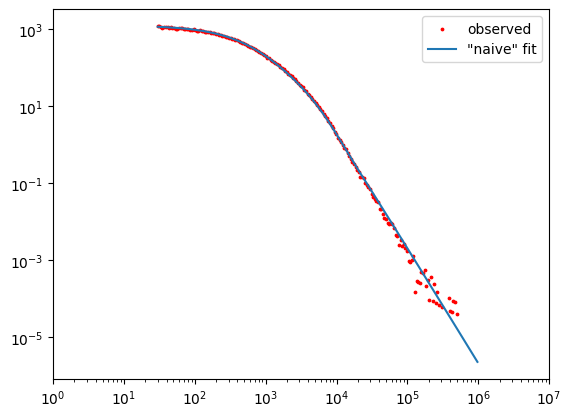

In [13]:
plot_hist(ĥ; s=3, color="red", label="observed")
x, y = xy(ĥ)
TN = res[3].para
plot(x, map(x->hid(TN, 2.36e-8, x), x), label="\"naive\" fit")

legend()
xlim(1e0,1e7)
xscale("log")
yscale("log")